<a href="https://colab.research.google.com/github/23-cristina/QUIMICA/blob/main/Actividad_cinetica_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>Actividad: Termodinámica vs cinética</b> </font>
<a name="loading"></a>

<font size='4' style="color:#00A6D6">  <b>

</b> </font>
<a name="loading"></a>

## [1] Instalación de librerías

In [50]:
  %%capture
  !pip install rdkit
  !pip install pyscf

In [51]:

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

## [2] Estructuras para el ácido fórmico

### Isómero CIS del ácido fórmico

In [34]:
# representación SMILES del isómero CIS
smi_cis = "O=CO"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

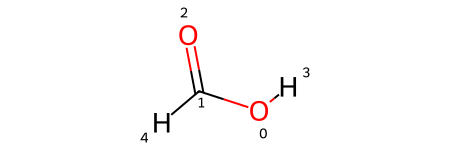

In [26]:
#visualizamos
cis

In [27]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

5

O      0.865201   -0.466197    0.230670
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H      1.502860    0.054160    0.852485
H     -1.251043   -0.727386   -0.110010


### Isómero TRANS del ácido fórmico

In [28]:
smi_trans = "O=CO"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

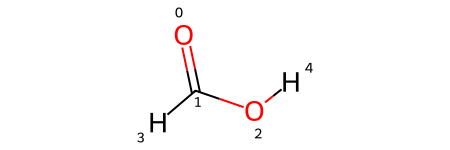

In [29]:
trans

In [23]:
!cat trans.xyz

5

O     -0.716414    1.165969    0.240867
C     -0.458745   -0.055204    0.230827
O      0.826557   -0.494694    0.129333
H     -1.277154   -0.751936    0.304341
H      1.625755    0.135865    0.239444


### Diedro = 90.0 º

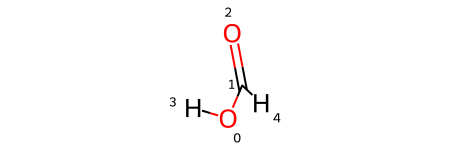

In [30]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [31]:
!cat diedro90.xyz

5

O     -0.770885   -0.816099    1.160757
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H     -1.587577   -0.571590    1.741502
H      0.003393   -0.459106   -0.823133


## [3] Cálculo de energía de activación de la reacción química de isomerización del ácido fórmico

### CIS

In [35]:
cis = gto.M(atom="cis.xyz")

In [36]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [37]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -187.129033059614


-187.12903305961404

### Diedro 90

In [38]:
cis_90 = gto.M(atom="diedro90.xyz")

In [39]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [40]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -187.124898824245


-187.12489882424524

### TRANS

In [41]:
trans = gto.M(atom="trans.xyz")

In [42]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [43]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -187.129033059614


-187.129033059614

## 4. Gráfica de la reacción química de isomerización

In [44]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [45]:
import matplotlib.pyplot as plt
from energydiagram import ED

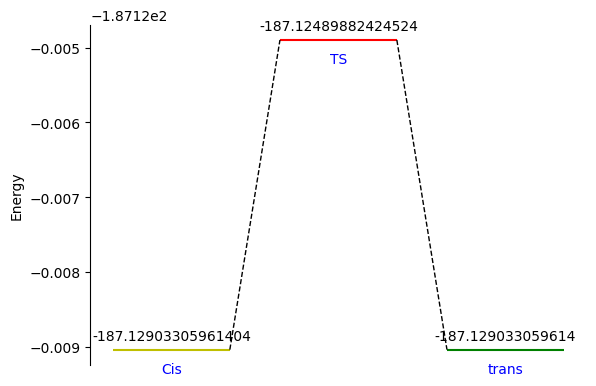

In [46]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / $kcal$ $mol^{-1}$")

## Cinética de la reacción química de isomerización:

In [47]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

0.0041342353688094136

## Termodinámica: Calculando el tipo de reacción

In [49]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
